<a href="https://colab.research.google.com/github/surayaqis/Data-Science-Project/blob/main/P166248__Week7_DataManipulation_Pandas_20251122_ORI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week7:Data Manipulation with Pandas**
Details of codes used in this notebook can be found in this textbook: **Python Data Science Handbook by Jake VanderPlas: https://tinyurl.com/33ha6r7s**

In [1]:
# Mount to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Pandas and NumPy library**

In [2]:
# Import necessary library
import numpy as np
import pandas as pd

# Define the RandomState object with a seed
# Will produce the same sequence of "random" numbers every time the code runs
# if there's no seed, the random number between person A and B are different.
rng = np.random.RandomState(42)

## **The Pandas Series Object - One dimensional array of indexed data**

In [3]:
# Pandas series wraps both sequence of values and sequence of indices
data = pd.Series([.25, .5, .75, 1.0])
data

#float64 is decimal number

,0
0,0.25
1,0.50
2,0.75
3,1.00


In [4]:
# Check the data values
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
# Check the data index
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
# Accessed value using index - single element
data[1]

np.float64(0.5)

### **Implicit indexing**
**The Rules:**

**Start index: INCLUSIVE** (includes the element at this position)

**End index: EXCLUSIVE** (stops before this position)

In [7]:
# Create a list
my_list = [0, 1, 2, 3, 4, 5]

# Slicing: [start:end]
my_list[1:4]  # Returns [1, 2, 3]
# Includes index 1 (inclusive)
# Excludes index 4 (exclusive) - stops at index 3

[1, 2, 3]

In [8]:
my_list[:3]   # Returns [0, 1, 2]
# Start implicitly 0, end is 3 (exclusive)

[0, 1, 2]

# Notes
[:4] : means start from zero, exclude 4


In [9]:
my_list[2:]   # Returns [2, 3, 4, 5]
# Start at 2 (inclusive), end implicitly goes to the end

[2, 3, 4, 5]

In [10]:
my_list[:]    # Returns entire list
# Both start and end are implicit

[0, 1, 2, 3, 4, 5]

### **Explicit indexing - use labels on purpose**

- **manually specify or assign the index (labels) to each item** in a Pandas Series or DataFrame

In [11]:
# Index need not be an integer
# Index can take on "string" format as well
# We can define the indexes ourselves
data = pd.Series([.25, .5, .75, 1.0],
                 index = ['a', 'b', 'c', 'bernard'])
data

,0
a,0.25
b,0.50
c,0.75
bernard,1.00


In [12]:
# Extract data using index
# The ending label is included in the slice
data['a':'bernard']

,0
a,0.25
b,0.50
c,0.75
bernard,1.00


### **Series as a specialized dictionary**

In [13]:
# Create a dictionary
pop_dict = {'California': 38332521,
            'Texas': 26448193,
            'New York': 19651127,
            'Florida': 19552860,
            'Illinois': 12882135}

## **Pandas Series -> index & value**
- one-dimensional labeled array

In [14]:
# Convert dictionary to pandas Series
population = pd.Series(pop_dict)
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


## **Pandas DataFrame -> row name & column name**
- two-dimensional labeled data structure

In [15]:
# Convert to pandas DataFrame
pd.DataFrame(population)

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [16]:
# Extract using index - use row name to extract
population['California']

np.int64(38332521)

In [17]:
# Extract using index - multiple row names
population['California':'New York']

,0
California,38332521
Texas,26448193
New York,19651127


## ***Notes: To extract from Pandas DataFrame, we need to use square bracket "[ ]"***

### **The Pandas DataFrame Object**
DataFrame is a **two-dimensional array** with both flexible row indices and flexible column names

In [18]:
# A dictionary
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
               'Florida': 170312, 'Illinois': 149995}

In [19]:
# Convert to pd Series -> area
area = pd.Series(area_dict)

In [20]:
# Output area content
area

,0
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [21]:
# Output population content
population

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [22]:
# Create a pandas DataFrame using population and area Series data -> states
# Use dictionary type to create the DataFrame -> use curly bracket to create a Python library
states = pd.DataFrame({'Populasi': population,
                       'keluasan': area})
states

,Populasi,keluasan
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [23]:
# Extract using index
# Show difference between single bracket vs double bracket
print(states['Populasi']) # Single bracket -> returns a Series format (its original format)
print('\n ---------- \n')
states[['Populasi']] # Double bracket -> keep the DataFrame format

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Populasi, dtype: int64

 ---------- 



,Populasi
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [24]:
# Pandas DataFrame formed from 'area' Series
# Without giving the column name -> Pandas will assign numerical value as column name
# Column name becomes 0
pd.DataFrame(area)

,0
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [25]:
# Give an explicit name to the column name
# Using the columns() function
pd.DataFrame(area, columns=['Keluasan (m^2)'])

,Keluasan (m^2)
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [26]:
# Lists formed from a list of dictionaries
data = [{'a': 1, 'b': 2 * i}
        for i in range(3)] # i take on the values 0, 1, and 2
data

[{'a': 1, 'b': 0}, {'a': 1, 'b': 2}, {'a': 1, 'b': 4}]

In [27]:
# Turn into Pandas dataframe
pd.DataFrame(data)

,a,b
0,1,0
1,1,2
2,1,4


## **NaN**: Not a Number

In [28]:
# Pandas data frame with missing data
# NaN is a special floating-point value
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


### **Form pandas DataFrame using a two-dimensional NumPy array**

In [29]:
# Create a reproducible random state
rng = np.random.RandomState(50)

# Create a pandas dataframe of 3x2
pd.DataFrame(rng.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.494602,0.228083
b,0.255474,0.396330
c,0.377315,0.996574


### `rand()`**: uniform random numbers between 0 and 1**
- all possible numbers in this interval are equally likely
- including numbers with decimal places

In [30]:
# Create a reproducible random state
rng = np.random.RandomState(42)

# Create a 3 x 5 data frame
trial = pd.DataFrame(rng.rand(3, 5), # dimension of 3x5
             columns=['foo', 'bar', 'Ali', 'Abu', 'Ahmad'],
             index=['a', 'b', 'c'])
trial

,foo,bar,Ali,Abu,Ahmad
a,0.374540,0.950714,0.731994,0.598658,0.156019
b,0.155995,0.058084,0.866176,0.601115,0.708073
c,0.020584,0.969910,0.832443,0.212339,0.181825


In [31]:
# Add column # 6 with standard normal data
trial['Suraya'] = np.random.standard_normal(3)
trial

,foo,bar,Ali,Abu,Ahmad,Suraya
a,0.374540,0.950714,0.731994,0.598658,0.156019,1.072984
b,0.155995,0.058084,0.866176,0.601115,0.708073,0.260263
c,0.020584,0.969910,0.832443,0.212339,0.181825,-0.367070


### `standard_normal()`
- In a **"standard" normal distribution**, the **average (mean) is 0**, and **the spread (standard deviation) is 1**.
- numbers can be **positive or negative**
- **centered around zero**
- most values **clustering close to the mean** and **fewer values further away**.

In [32]:
# Division
trial['div'] = trial['foo'] / trial['bar']
trial

,foo,bar,Ali,Abu,Ahmad,Suraya,div
a,0.374540,0.950714,0.731994,0.598658,0.156019,1.072984,0.393957
b,0.155995,0.058084,0.866176,0.601115,0.708073,0.260263,2.685689
c,0.020584,0.969910,0.832443,0.212339,0.181825,-0.367070,0.021223


In [33]:
# Max for foo
trial['foo'].max()

0.3745401188473625

In [34]:
# Max for div
trial['div'].max()

2.6856890353938594

### **The Pandas Index Object**

In [35]:
# Create pandas index
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [36]:
# Access individual index
ind[1]

np.int64(3)

In [37]:
# Indexing and a step size of 3
ind[::3]

Index([2, 7], dtype='int64')

### **Index as ordered set**

In [38]:
# Index as ordered set
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [39]:
# Intersection -> '&'
# Returning a new set containing only the elements 'common' to both sets.
indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

In [40]:
# Union -> '|'
# Combining the elements of both sets, excluding duplicates.
indA.union(indB)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

# **Data Indexing and Selection**

In [41]:
# Series as dictionary
data = pd.Series([0.25, 0.5, 0.75, 1],
                 index=['a', 'b', 'c', 'd'])
data

,0
a,0.25
b,0.50
c,0.75
d,1.00


In [42]:
# Logical testing
'b' in data

True

In [43]:
# The keys() method is used to retrieve the index labels of the Series
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

## `tuple`-> **ordered, immutable collection of items**

In [44]:
# The items() function -> to get the key and value pair
# Returns a list of tuples where each tuple contains an index-label and its corresponding value from the Series
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [45]:
# Adding new row of data
# always use bracket "[]"
data['e'] = 1.25
data

,0
a,0.25
b,0.50
c,0.75
d,1.00
e,1.25


In [46]:
# Slicing by explicit index - on purpose, use the 'labels'
data['a':'c']

,0
a,0.25
b,0.50
c,0.75


# **What is implicit indexing?**
* **Uses the location (numeric) of the indices**
* **Implicit indexing - the index of an item is <font color='red'>*automatically assigned by the system*</font>, typically based on the order or position of the item.**

# **What is explicit indexing?**
* **Explicit indexing is when we <font color='red'>*manually specify or assign the index to each item*</font>.**

In [47]:
# Slicing by implicit integer index
data[0:2]

,0
a,0.25
b,0.50


# **Masking in Python**
* Masking comes up when we want to <font color='red'>***extract, modify, count***</font>, or <font color='red'>***manipulate values in an array or DataFrame***</font> based on some criterion.
* it involves creating a <font color='red'>**Boolean mask**</font>—an array of <font color='red'>**True/False values**</font>—that corresponds to the elements we want to select or modify.
* For example, we might wish to
    * **count all values greater than a certain value**, or
    * **perhaps remove all outliers that are above some threshold**.

In [48]:
# Masking - technique in Pandas (and NumPy) for selecting data based on one or more conditions.
data[(data > .3) & (data < .8)]

,0
b,0.50
c,0.75


In [49]:
# Fancy indexing -> by giving a list
data[['a', 'e']]

,0
a,0.25
e,1.25


# **Indexers: loc, & iloc**

In [50]:
# Create a pandas Series
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

,0
1,a
3,b
5,c


### **loc attribute** allows indexing and slicing that always references the **explicit index**
- using **labels**

In [51]:
# Explicit index when indexing
data.loc[1]

'a'

In [52]:
# Explicit index when slicing - multiple condition
data.loc[1:3]

,0
1,a
3,b


### **iloc attribute** allows indexing and slicing that always references the ***implicit Python-style index***

In [53]:
# display data content
data

,0
1,a
3,b
5,c


In [54]:
# Using iloc
data.iloc[1]

'b'

In [55]:
# Slicing using iloc
data.iloc[1:3]

,0
3,b
5,c


### **DataFrame as a dictionary**

In [56]:
# DataFrame as a dictionary
data = pd.DataFrame({'area': area, 'pop':population})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [57]:
# Explicit indexing -> DataFrame format
# Using double bracket
data[['area']]

,area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [58]:
# Adding a new column -> 'density
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# **DataFrame as two-dimensional array**

In [59]:
# Display the content of 'data'
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [60]:
# Transpose the dataframe
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [61]:
# Implicit indexing
# Using iloc function - using integer indexing method
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [62]:
# Explicit indexing
# Using loc
data.loc[:'Florida', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [63]:
# Complex - Explicit indexing using loc
# additional condition
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [64]:
# Edit value using Implicit indexing method
# Florida & density -> 115
data.iloc[3, 2] = 115
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,115.000000
Illinois,149995,12882135,85.883763


In [65]:
# Edit value using Implicit indexing method
# Texas & area -> 115
data.iloc[1, 0] = 115
data

,area,pop,density
California,423967,38332521,90.413926
Texas,115,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,115.000000
Illinois,149995,12882135,85.883763


In [66]:
# Edit value using Implicit indexing method
# Texas & area -> 115
data.loc['Illinois', 'area'] = 149996
data

,area,pop,density
California,423967,38332521,90.413926
Texas,115,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,115.000000
Illinois,149996,12882135,85.883763


# **Operating on Data in Pandas**

### **Index alignment in Series**

In [67]:
# Create some data
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [68]:
# Compute the population density
population / area

,0
Alaska,NaN
California,90.413926
New York,NaN
Texas,38.018740


# **Index alignment in DataFrame**

In [69]:
# Create some data
rng = np.random.RandomState(50)
x = pd.DataFrame(rng.randint(0, 20, (2,2)),
                 columns=list('AB'))
x

,A,B
0,16,0
1,11,13


In [70]:
# Create some data
rng = np.random.RandomState(100)
y = pd.DataFrame(rng.randint(0, 10, (3,3)),
                 columns=list('BAC'))
y

,B,A,C
0,8,8,3
1,7,7,0
2,4,2,5


In [71]:
# Summation
x + y

,A,B,C
0,24.0,8.0,NaN
1,18.0,20.0,NaN
2,NaN,NaN,NaN


# **Pandas DataFrame: stack() function**
* The ***stack()*** function is used to **stack the prescribed level(s) from <font color=red>*columns to index*</font>.**
* For more information, please visit this website: https://tinyurl.com/mt27xnk9
* ***change from wide format to long format***

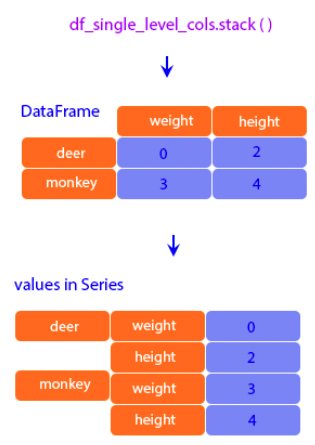

In [72]:
# Display content of A
A

NameError: name 'A' is not defined

In [ ]:
# Transform the DataFrame A by stacking its columns to create a new Series
A.stack()

In [ ]:
# Getting the median
fill = A.stack().median()
fill

In [ ]:
# Summation
x + y

In [ ]:
# Fill every missing value with the above median value
print(x)
print('\n -------\n')
print(y)
print('\n -------\n')
x.add(y, fill_value = fill)

# **Operations Between DataFrame and Series**

In [ ]:
# Create an array
rng = np.random.RandomState(100)

# the random integers will be drawn from the interval [0, 10)
# integers between 0 (inclusive) and 9 (inclusive)
A = rng.randint(10, size=(3, 4))
A

In [ ]:
# Substraction
# A[0] is the first row
A - A[0]

In [ ]:
# Create a pandas dataframe
df = pd.DataFrame(A, columns=list('QRST'))
df

In [ ]:
# Substraction using implicit indexing
# Using iloc function
df - df.iloc[0]

In [ ]:
# Extract information
df['R']

In [ ]:
# Show content of df
df

### `axis = 0` is **row by row**

In [ ]:
# Another way
# Substration along the rows
df.subtract(df['R'], axis = 0)


# **Dropping null values**

In [ ]:
# Create a pandas DataFrame
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df

In [ ]:
# dropna() removes NA values - row wise
# Cannot drop single values from a DataFrame
df.dropna()

### `axis = 1` is **column by column**

In [ ]:
# Drops all columns containing a null value
# column wise
df.dropna(axis = 1)

In [ ]:
# Display content for df
df

In [ ]:
# Assign missing data
df[3] = np.nan

In [343]:
# Display updated df content
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [344]:
# how='all' & how='any'
# how='all' will only drop rows/columns that are all null values
df.dropna(axis = 1, how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [345]:
# how='any'
df.dropna(axis = 1, how = 'any')

,2
0,2
1,5
2,6


# ***thresh*** parameter lets us specify a ***minimum number of non-null values*** for the row/column to be kept:

In [346]:
# Display df content
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [347]:
# Minimum number of non-null values for the row/column to be kept
# thresh=3
df.dropna(axis = 0, thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [348]:
# Create a pandas series
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

,0
a,1.0
b,NaN
c,2.0
d,NaN
e,3.0


In [349]:
# fillna with 0
data.fillna(0)

,0
a,1.0
b,0.0
c,2.0
d,0.0
e,3.0


# ***Fillna using some permutation***

# ***ffill***: forward-fill; propagate the previous value forward

In [350]:
# Forward fill
data.ffill()

,0
a,1.0
b,1.0
c,2.0
d,2.0
e,3.0


# **Backward fill**

In [351]:
# backward fill
data.bfill()

,0
a,1.0
b,2.0
c,2.0
d,3.0
e,3.0


The ***NA*** value remains if a previous value is not available during a forward fill.

In [352]:
# Display content for df
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [353]:
# NA value remains if a previous value is not available during a forward fill
# axis=1
df. ffill(axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# **Pandas MultiIndex**

# **Hierarchical Indexing: incorporate multiple index levels within a single index**


In [354]:
# Hierarchical Indexing - multiple indexing
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

,0
"(California, 2000)",33871648
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820
"(Texas, 2010)",25145561


In [355]:
# Slicing
pop[('California', 2010):('Texas', 2000)]

,0
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820


# **The Better Way: Pandas MultiIndex**

In [ ]:
# Create a multi-index from the tuples
index = pd.MultiIndex.from_tuples(index)
index

In [357]:
# Display original content of pop
pop

,0
"(California, 2000)",33871648
"(California, 2010)",37253956
"(New York, 2000)",18976457
"(New York, 2010)",19378102
"(Texas, 2000)",20851820
"(Texas, 2010)",25145561


In [358]:
# Re-index series with MultiIndex
# Blank entry indicates the same value as the line above it.
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [359]:
# Access all data for which the second index is 2010
pop[:, 2010]

,0
California,37253956
New York,19378102
Texas,25145561


# **MultiIndex as extra dimension**

In [360]:
# Display original pop content
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [361]:
# Convert a multiple indexed Pandas Series into a conventionally indexed DataFrame
# unstack() -> change back to wide format
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [362]:
# stack() method provides the opposite operation
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [363]:
# Display original pop_df
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [364]:
# Adding another column
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [365]:
# Display original pop content
# Multi index data
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [366]:
# Display pop_df
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [367]:
# Compute the fraction of people under 18 by year
(pop_df['under18'] / pop_df['total']).unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


# **Methods of MultiIndex Creation**

In [368]:
# Pass a list of two or more index arrays
#df = pd.DataFrame(rnp.random.rand(4, 2),
df = pd.DataFrame(rng.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.136707  0.575093
  2  0.891322  0.209202
b 1  0.185328  0.108377
  2  0.219697  0.978624

In [369]:
# Pass a dictionary with appropriate tuples as keys
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [370]:
# Display pop content
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# **MultiIndex level names**

In [371]:
# Name the levels of the MultiIndex
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [372]:
# Hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# Mock some data
# Create a RandomState object with a seed
rng = np.random.RandomState(52)
data = np.round(rng.randn(4, 6), 1) # size of 4x6, 1 decimal place
data[:, ::2] *= 10 # in-place multiplication operation; multiplies each element selected by the slicing operation by 10 and updates the original array
data += 37

# Create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  35.7  39.0  36.2  37.0  37.4
     2      50.0  37.7  32.0  38.5  33.0  38.5
2014 1      39.0  37.5  47.0  36.6  29.0  36.8
     2      29.0  35.3  45.0  38.2  43.0  36.5

In [373]:
# Slicing by the person's name
# Explicit indexing by using label
health_data['Guido']

type          HR  Temp
year visit            
2013 1      39.0  36.2
     2      32.0  38.5
2014 1      47.0  36.6
     2      45.0  38.2

# **Indexing and Slicing a MultiIndex**

In [374]:
# Display pop content
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Access single elements by indexing with multiple terms
# Complete slicing
pop['California', 2000]

In [376]:
# Partial indexing / slicing
pop['California']

,0
year,
2000,33871648
2010,37253956


In [377]:
# Partial slicing
# Using loc function
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [378]:
# Partial indexing
pop[:, 2000]

,0
state,
California,33871648
New York,18976457
Texas,20851820


In [379]:
# Selection based on Boolean masks
# condition to meet
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [380]:
# Selection based on fancy indexing
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

# **Multiple indexed DataFrames**

In [381]:
# Display health_data
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  35.7  39.0  36.2  37.0  37.4
     2      50.0  37.7  32.0  38.5  33.0  38.5
2014 1      39.0  37.5  47.0  36.6  29.0  36.8
     2      29.0  35.3  45.0  38.2  43.0  36.5

In [382]:
# Extract Guido's heart rate
health_data['Guido', 'HR']

year  visit
2013  1        39.0
      2        32.0
2014  1        47.0
      2        45.0
Name: (Guido, HR), dtype: float64

In [383]:
# Using the iloc indexer
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      42.0  35.7
     2      50.0  37.7

In [384]:
# Passed a tuple of multiple indices -> ordered, immutable collection of items
# Using loc -> explicit indexing
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        42.0
      2        50.0
2014  1        39.0
      2        29.0
Name: (Bob, HR), dtype: float64

In [385]:
# Display health_data content
print(health_data)
print('\n---------------\n')

# Indexing using IndexSlice
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']] # for rows and columns

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  35.7  39.0  36.2  37.0  37.4
     2      50.0  37.7  32.0  38.5  33.0  38.5
2014 1      39.0  37.5  47.0  36.6  29.0  36.8
     2      29.0  35.3  45.0  38.2  43.0  36.5

---------------



,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,42.0,39.0,37.0
2014,1,39.0,47.0,29.0


# **Stacking and unstacking indices**

In [386]:
# Display pop content
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [387]:
# Convert a dataset from a stacked multi-index to a simple 2D representation
# level = 0 -> pivots the first level of the index ('state') into columns
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [388]:
# Unstack based on level = 1
# Pivots the second level of the index ('year') into columns.
pop.unstack(level = 1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [389]:
# Opposite of unstack() is stack()
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# **Index setting and resetting**

In [390]:
# Display pop content
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [391]:
# Reset the index
pop_flat = pop.reset_index(name = 'population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [392]:
# Build multi index
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

# **Data Aggregations on Multi-Indices**
* Aggregation is the process of **combining multiple data points** into a **single summary value**.
* Pandas has built-in data aggregation methods, such as ***mean(), sum(), and max()***

In [393]:
# Display health_data
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  35.7  39.0  36.2  37.0  37.4
     2      50.0  37.7  32.0  38.5  33.0  38.5
2014 1      39.0  37.5  47.0  36.6  29.0  36.8
     2      29.0  35.3  45.0  38.2  43.0  36.5

In [394]:
# Aggregate average measurements for the two visits each year
data_mean = health_data.groupby('year').mean()
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     46.0  36.7  35.5  37.35  35.0  37.95
2014     34.0  36.4  46.0  37.40  36.0  36.65

In [395]:
# Take the mean among levels on the columns
data_mean.T.groupby('type').mean()

year,2013,2014
type,,
HR,38.833333,38.666667
Temp,37.333333,36.816667


# **Good Luck and See you all soon!!!** 😀